# ***Amazon Sales Data - Yashvi Bhadania (24MCD021)***
## **A. Binning and Smoothing** 

### 1. Data Loading and Initial Exploration  
- Load the **Amazon Sales** dataset.  
- Display the **first 10 rows**.  

### 2. Binning Techniques  
- **Equal Width Binning**: Divides data into equal-sized intervals.  
- **Equal Frequency Binning**: Ensures each bin has an equal number of values.  

### 3. Data Smoothing  
- **Mean Smoothing**: Replaces bin values with the mean.  
- **Median Smoothing**: Replaces bin values with the median.  
- **Boundary Smoothing**: Replaces with the closest boundary value.  

### 4. Visualizations  
- **Original Data Distribution**.  
- **Comparison of Different Binning and Smoothing Methods** using histograms.  

/var/folders/nk/hgf7_brn39q9t4srskbh3vjr0000gn/T/ipykernel_2118/3433965265.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


First 10 rows of the dataset:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   
5      5  404-1490984-4578765  04-30-22                       Shipped   
6      6  408-5748499-6859555  04-30-22                       Shipped   
7      7  406-7807733-3785945  04-30-22  Shipped - Delivered to Buyer   
8      8  407-5443024-5233168  04-30-22                     Cancelled   
9      9  402-4393761-0311520  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style                  SKU  \
0   Merchant      Amazon.in           Standard   SET389       SET389-KR-NP-S   
1   Me

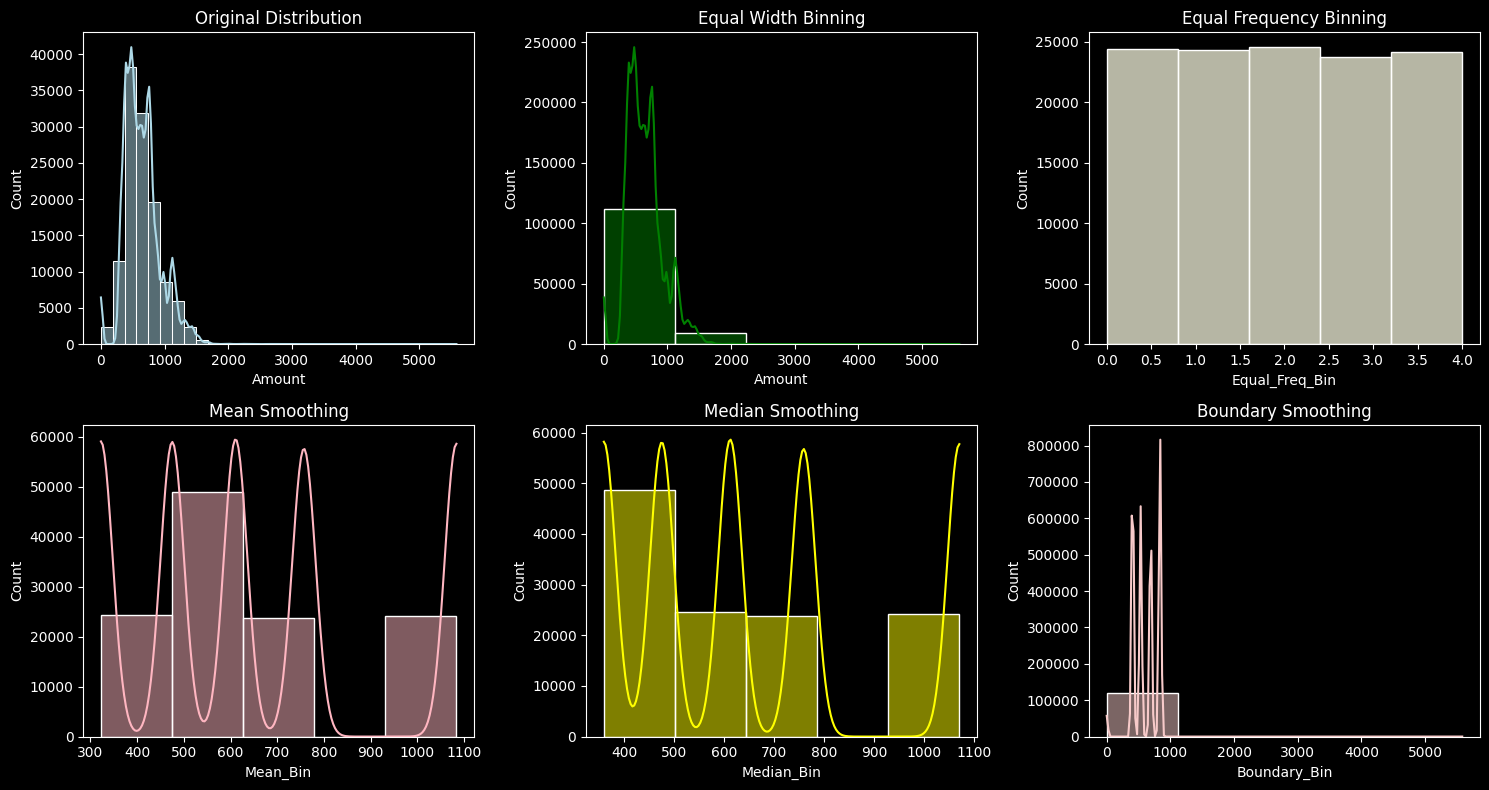

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Load the dataset (replace with your actual file path)
df = pd.read_csv('Amazon Sale Report.csv')

# Show the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Select a numerical column for binning (modify as needed)
col = 'Amount'  # Change this to the column you want to bin

# Drop NaN values for accurate binning
df = df.dropna(subset=[col])

# Equal Width Binning
num_bins = 5  # Define the number of bins
df['Equal_Width_Bin'] = pd.cut(df[col], bins=num_bins, labels=False)

# Equal Frequency Binning
df['Equal_Freq_Bin'], bin_edges = pd.qcut(df[col], q=num_bins, labels=False, retbins=True)

# Mean Smoothing
df['Mean_Bin'] = df['Equal_Freq_Bin'].map(df.groupby('Equal_Freq_Bin')[col].mean())

# Median Smoothing
df['Median_Bin'] = df['Equal_Freq_Bin'].map(df.groupby('Equal_Freq_Bin')[col].median())

# Boundary Smoothing (replace with closest boundary value)
def boundary_smoothing(val, bin_index, bin_edges):
    lower, upper = bin_edges[bin_index], bin_edges[bin_index + 1]
    return lower if abs(val - lower) < abs(val - upper) else upper

df['Boundary_Bin'] = df.apply(lambda row: boundary_smoothing(row[col], row['Equal_Freq_Bin'], bin_edges), axis=1)

# Display the first 10 rows with smoothing
print("\nFirst 10 rows after binning and smoothing:")
print(df[[col, 'Equal_Width_Bin', 'Equal_Freq_Bin', 'Mean_Bin', 'Median_Bin', 'Boundary_Bin']].head(10))

# Visualization
plt.figure(figsize=(15, 8))

# Original Distribution
plt.subplot(2, 3, 1)
sns.histplot(df[col], bins=30, kde=True, color='lightblue')
plt.title("Original Distribution")

# Equal Width Binning
plt.subplot(2, 3, 2)
sns.histplot(df[col], bins=num_bins, kde=True, color='green')
plt.title("Equal Width Binning")

# Equal Frequency Binning
plt.subplot(2, 3, 3)
sns.histplot(df['Equal_Freq_Bin'], bins=num_bins, kde=False, color='beige')
plt.title("Equal Frequency Binning")

# Mean Smoothing
plt.subplot(2, 3, 4)
sns.histplot(df['Mean_Bin'], bins=num_bins, kde=True, color='lightpink')
plt.title("Mean Smoothing")

# Median Smoothing
plt.subplot(2, 3, 5)
sns.histplot(df['Median_Bin'], bins=num_bins, kde=True, color='yellow')
plt.title("Median Smoothing")

# Boundary Smoothing
plt.subplot(2, 3, 6)
sns.histplot(df['Boundary_Bin'], bins=num_bins, kde=True, color='#F7CAC9')
plt.title("Boundary Smoothing")

plt.tight_layout()
plt.show()

## **B. Data Normalization**

Normalization scales data into a specific range or distribution for better analysis.  

### **Techniques Used:**  
- **Min-Max Normalization**: Scales values between 0 and 1.  
- **Z-Score Normalization**: Standardizes data to have a mean of 0 and a standard deviation of 1.  

### **Visualizations:**  
- Histograms before and after normalization to compare distributions.  

    Amount  MinMax_Normalized  ZScore_Normalized
0   647.62           0.115978          -0.003348
1   406.00           0.072708          -0.862562
2   329.00           0.058918          -1.136378
3   753.33           0.134909           0.372563
4   574.00           0.102794          -0.265145
5   824.00           0.147564           0.623869
6   653.00           0.116941           0.015784
7   399.00           0.071454          -0.887454
9   363.00           0.065007          -1.015472
10  685.00           0.122672           0.129577


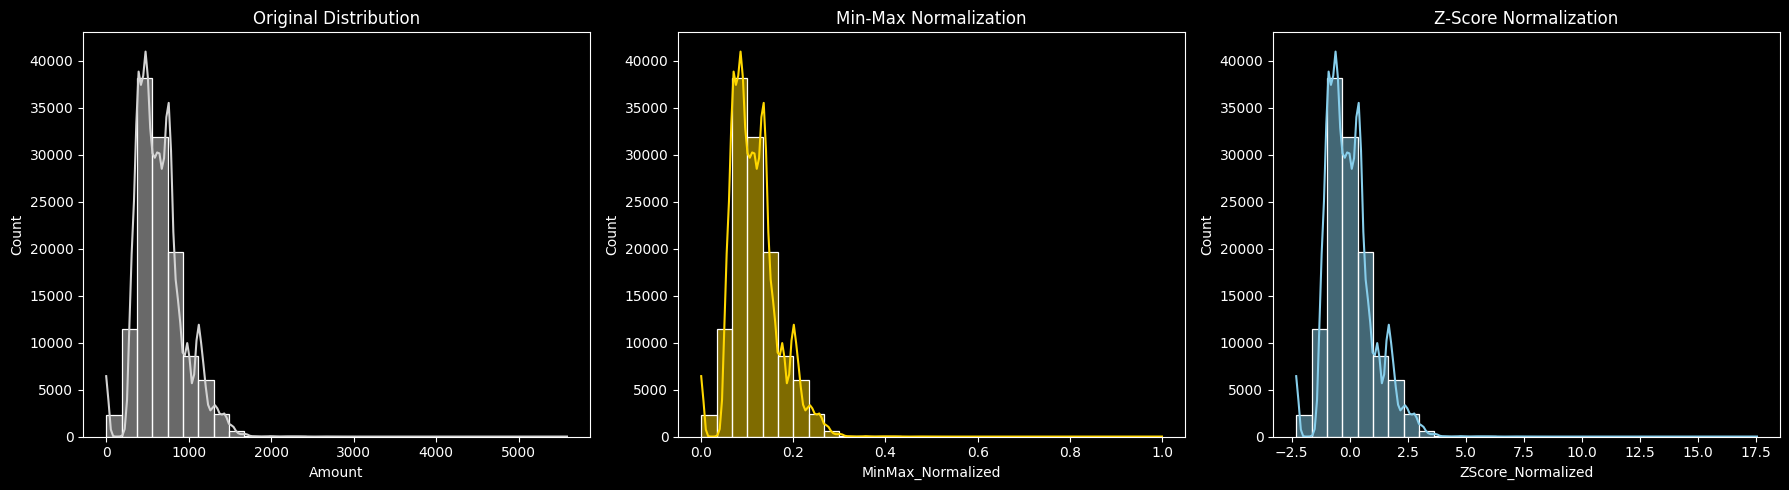

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Normalization with a custom range (e.g., 0 to 1)
# Take user input for Min-Max normalization range
min_val, max_val = map(int, input("Enter Min and Max values (e.g., 0 1): ").split())

scaler_minmax = MinMaxScaler(feature_range=(min_val, max_val))
df['MinMax_Normalized'] = scaler_minmax.fit_transform(df[[col]])

# Z-Score Normalization (Standardization: mean=0, std=1)
scaler_zscore = StandardScaler()
df['ZScore_Normalized'] = scaler_zscore.fit_transform(df[[col]])

# Display the first few rows to check the new scaling
print(df[['Amount', 'MinMax_Normalized', 'ZScore_Normalized']].head(10))

# Visualization
plt.figure(figsize=(18, 5))

# Original Distribution (leftmost plot)
plt.subplot(1, 3, 1)
sns.histplot(df[col], bins=30, kde=True, color='lightgray')
plt.title("Original Distribution")

# Min-Max Normalization
plt.subplot(1, 3, 2)
sns.histplot(df['MinMax_Normalized'], bins=30, kde=True, color='gold')
plt.title("Min-Max Normalization")

# Z-Score Normalization
plt.subplot(1, 3, 3)
sns.histplot(df['ZScore_Normalized'], bins=30, kde=True, color='skyblue')
plt.title("Z-Score Normalization")

plt.tight_layout()
plt.show()

 ## **C. Chi-Square Test for Independence**  
The **Chi-Square Test** helps determine if two categorical variables are **independent** or have a **relationship**.  

### **Steps:**  
1. Create a **contingency table** using two categorical variables.  
2. Perform the **Chi-Square test**.  
3. Display a table with **observed values and expected values** in each cell.  
4. Interpret the **p-value**:  
   - **p < 0.05** → Variables are **dependent** (statistically significant).  
   - **p ≥ 0.05** → Variables are **independent** (no significant relationship).  

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# Load your dataset (assuming it is already in df)
# df = pd.read_csv("your_amazon_sales_data.csv")  # Uncomment if loading from a file

# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display categorical columns
print("Categorical columns available:")
for i, col in enumerate(categorical_columns, 1):
    print(f"{i}. {col}")

# Get user input for column selection
col1 = input("Enter the first categorical column: ")
col2 = input("Enter the second categorical column: ")

# Check if inputs are valid categorical columns
if col1 not in categorical_columns or col2 not in categorical_columns:
    print("Invalid column selection. Please choose from the listed categorical columns.")
else:
    # Let the user choose the significance level
    significance_levels = {1: 0.10, 2: 0.05, 3: 0.01}

    print("\nChoose a significance level:")
    for key, value in significance_levels.items():
        print(f"{key}. {value} (alpha)")

    try:
        alpha_choice = int(input("Enter the corresponding number (1/2/3): "))
        if alpha_choice not in significance_levels:
            raise ValueError("Invalid choice.")
        alpha = significance_levels[alpha_choice]
    except ValueError:
        print("Invalid input. Using default alpha = 0.05")
        alpha = 0.05

    print(f"\nSelected Significance Level: {alpha}")

    # Create a contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])

    print("\nContingency Table:")
    print(contingency_table)

    # Compute row and column sums
    row_sums = contingency_table.sum(axis=1).values.reshape(-1, 1)  # Column vector
    col_sums = contingency_table.sum(axis=0).values.reshape(1, -1)  # Row vector
    total = contingency_table.values.sum()

    print("\nRow Sums:")
    print(pd.DataFrame(row_sums, index=contingency_table.index, columns=["Row Sum"]))

    print("\nColumn Sums:")
    print(pd.DataFrame(col_sums, columns=contingency_table.columns, index=["Col Sum"]))

    print("\nTotal Sum:", total)

    # Compute expected frequencies manually using formula: (row_sum * col_sum) / total
    expected = (row_sums @ col_sums) / total  # Matrix multiplication

    # Convert expected frequencies into a DataFrame
    expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

    print("\nExpected Frequencies Table (Computed using formula):")
    for i in range(expected_df.shape[0]):
        for j in range(expected_df.shape[1]):
            observed = contingency_table.iloc[i, j]
            expected_value = expected_df.iloc[i, j]
            row_sum_value = row_sums[i][0]
            col_sum_value = col_sums[0][j]
            print(f"Expected[{contingency_table.index[i]}, {contingency_table.columns[j]}] = "
                  f"({row_sum_value} * {col_sum_value}) / {total} = {expected_value:.4f}")

    print("\nExpected Frequencies Table:")
    print(expected_df)

    # Compute chi-square value manually: summation of ((observed - expected)^2 / expected)
    chi2_computed = np.sum((contingency_table.values - expected) ** 2 / expected)

    print("\nChi-Square Computed Value:", chi2_computed)

    # Compute degrees of freedom (df = (r-1) * (c-1))
    dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    print("Degrees of Freedom (df):", dof)

    # Get chi-square critical value from table for the chosen significance level
    chi2_critical = stats.chi2.ppf(1 - alpha, dof)
    print("Chi-Square Critical Value from Table:", chi2_critical)

    # Hypothesis testing
    if chi2_computed > chi2_critical:
        print("\nReject the null hypothesis and accept the alternative hypothesis. "
              "So the variables are associated (not independent).")
    else:
        print("\nFail to reject the null hypothesis. "
              "So the variables are not associated (independent).")

    # SAMPLE INPUT:
    # FULFILMENT AND FULFILMENT AND 2

    # OR
    # Fulfilment
    # Category
    # 2

Categorical columns available:
1. Order ID
2. Date
3. Status
4. Fulfilment
5. Sales Channel 
6. ship-service-level
7. Style
8. SKU
9. Category
10. Size
11. ASIN
12. Courier Status
13. currency
14. ship-city
15. ship-state
16. ship-country
17. promotion-ids
18. fulfilled-by
19. Unnamed: 22

Choose a significance level:
1. 0.1 (alpha)
2. 0.05 (alpha)
3. 0.01 (alpha)

Selected Significance Level: 0.05

Contingency Table:
Fulfilment  Amazon  Merchant
Fulfilment                  
Amazon       83639         0
Merchant         0     37541

Row Sums:
            Row Sum
Fulfilment         
Amazon        83639
Merchant      37541

Column Sums:
Fulfilment  Amazon  Merchant
Col Sum      83639     37541

Total Sum: 121180

Expected Frequencies Table (Computed using formula):
Expected[Amazon, Amazon] = (83639 * 83639) / 121180 = 57728.0271
Expected[Amazon, Merchant] = (83639 * 37541) / 121180 = 25910.9729
Expected[Merchant, Amazon] = (37541 * 83639) / 121180 = 25910.9729
Expected[Merchant, Merchant

## **D. Pearson's Correlation Coefficient and Covariance**

The **Pearson’s Correlation Coefficient (r)** measures the **strength and direction** of a linear relationship between two numerical variables. **Covariance** indicates how two variables **vary together**, but it does not standardize the relationship like correlation does.  

### **Steps:**  
1. **Select numerical columns** for analysis.  
2. **Compute covariance**
3. **Compute Pearson’s correlation coefficient (r)**
4. **Interpret Pearson's r**:  
   - **r = 1** → Perfect **positive** correlation.  
   - **r = -1** → Perfect **negative** correlation.  
   - **r = 0** → No correlation.  

5. **Visualize results**:  
   - **Scatter plot** with a **regression line**.  
   - **Heatmap** showing correlation values between numerical columns.  

Selected numerical columns:
['index', 'Qty', 'Amount', 'ship-postal-code']
Numerical columns available:
1. index
2. Qty
3. Amount
4. ship-postal-code

Computed Covariance between Qty and Amount: 4.0326
Computed Pearson’s Correlation Coefficient (r) between Qty and Amount: 0.0669


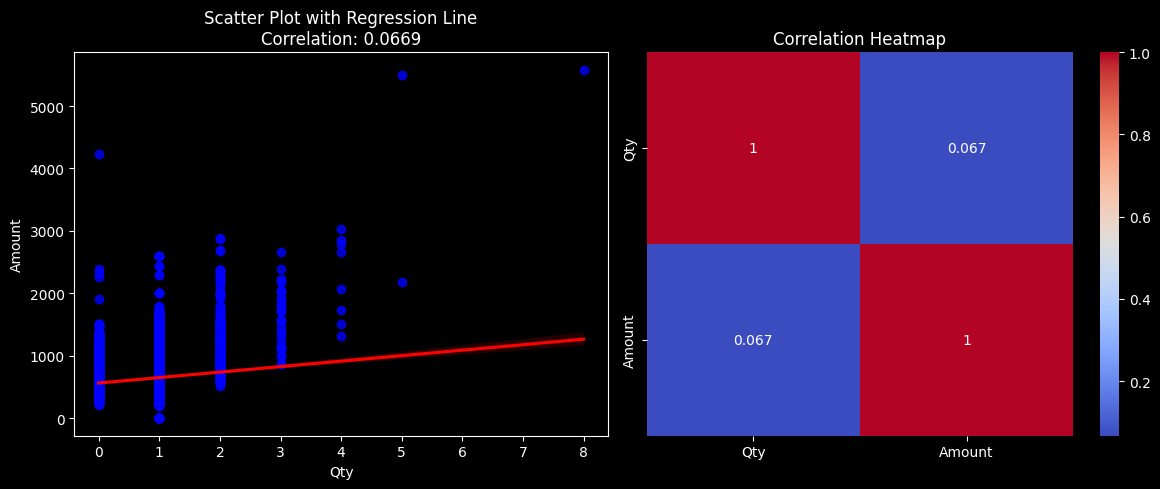

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns up to 'Unnamed: 22'
numerical_columns = df.iloc[:, :df.columns.get_loc("Unnamed: 22") + 1].select_dtypes(include=['number'])

# Display selected numerical columns
print("Selected numerical columns:")
print(numerical_columns.columns.tolist())


if len(numerical_columns) < 2:
    print("Not enough numerical columns to calculate correlation and covariance.")
else:
    # Display numerical columns
    print("Numerical columns available:")
    for i, col in enumerate(numerical_columns, 1):
        print(f"{i}. {col}")

    # Get user input for column selection
    col1 = input("\nEnter the first numerical column: ")
    col2 = input("Enter the second numerical column: ")

    # Check if inputs are valid numerical columns
    if col1 not in numerical_columns or col2 not in numerical_columns:
        print("Invalid column selection. Please choose from the listed numerical columns.")
    else:
        # Extract column values
        X = df[col1].values
        Y = df[col2].values

        # Compute means
        mean_X = sum(X) / len(X)
        mean_Y = sum(Y) / len(Y)

        # Compute covariance manually
        covariance = sum((X - mean_X) * (Y - mean_Y)) / (len(X) - 1)

        # Compute standard deviations manually
        std_X = (sum((X - mean_X) ** 2) / (len(X) - 1)) ** 0.5
        std_Y = (sum((Y - mean_Y) ** 2) / (len(Y) - 1)) ** 0.5

        # Compute Pearson’s correlation coefficient manually
        correlation = covariance / (std_X * std_Y)

        print(f"\nComputed Covariance between {col1} and {col2}: {covariance:.4f}")
        print(f"Computed Pearson’s Correlation Coefficient (r) between {col1} and {col2}: {correlation:.4f}")

        # -------- PLOTTING RESULTS --------

        # Scatter plot with regression line
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.regplot(x=df[col1], y=df[col2], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
        plt.title(f"Scatter Plot with Regression Line\nCorrelation: {correlation:.4f}")
        plt.xlabel(col1)
        plt.ylabel(col2)

        # Heatmap to visualize correlation
        plt.subplot(1, 2, 2)
        corr_matrix = np.array([[1, correlation], [correlation, 1]])
        sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", xticklabels=[col1, col2], yticklabels=[col1, col2])
        plt.title("Correlation Heatmap")

        plt.tight_layout()
        plt.show()

### INTERPRETATION OF ABOVE CORRELATION ANALYSIS:

- Each **blue dot** represents a transaction.
- The **x-axis** represents **Qty** (Quantity of items purchased).
- The **y-axis** represents **Amount** (Total transaction amount).
- The **red regression line** shows the trend.

In [25]:
# print(df)

## **E. Discretization by Intuitive Partitioning**  

**Discretization** is the process of converting continuous numerical values into discrete categories or bins.  
**Intuitive Partitioning** involves defining bin ranges manually based on domain knowledge rather than automated binning techniques like equal-width or equal-frequency binning.  


### **Steps for Intuitive Partitioning:**  
1. **Select a numerical column** to discretize.  
2. **Define meaningful bin edges** based on domain knowledge.  
3. **Label the bins** appropriately.  
4. **Apply the binning transformation**.  
5. **Analyze the distribution of the new discrete categories**.  


In [26]:
# Extract first two digits of postal codes
df['Region Code'] = df['ship-postal-code'].astype(str).str[:2]

# Mapping of first two digits to states (partial list)
postal_code_mapping = {
    '11': 'Delhi',
    '12': 'Haryana',
    '13': 'Punjab',
    '14': 'Punjab',
    '15': 'Punjab',
    '16': 'Chandigarh',
    '17': 'Himachal Pradesh',
    '18': 'Jammu & Kashmir',
    '19': 'Jammu & Kashmir',
    '20': 'Uttar Pradesh',
    '21': 'Uttar Pradesh',
    '22': 'Uttar Pradesh',
    '23': 'Uttar Pradesh',
    '24': 'Uttar Pradesh',
    '25': 'Uttar Pradesh',
    '26': 'Uttarakhand',
    '27': 'Uttarakhand',
    '28': 'Rajasthan',
    '29': 'Rajasthan',
    '30': 'Gujarat',
    '31': 'Gujarat',
    '32': 'Gujarat',
    '33': 'Gujarat',
    '34': 'Madhya Pradesh',
    '35': 'Madhya Pradesh',
    '36': 'Chhattisgarh',
    '37': 'Andhra Pradesh',
    '38': 'Gujarat',
    '39': 'Gujarat',
    '40': 'Maharashtra',
    '41': 'Maharashtra',
    '42': 'Maharashtra',
    '43': 'Maharashtra',
    '44': 'Maharashtra',
    '45': 'Madhya Pradesh',
    '46': 'Madhya Pradesh',
    '47': 'Madhya Pradesh',
    '48': 'Madhya Pradesh',
    '49': 'Chhattisgarh',
    '50': 'Telangana',
    '51': 'Andhra Pradesh',
    '52': 'Andhra Pradesh',
    '53': 'Andhra Pradesh',
    '56': 'Karnataka',
    '57': 'Karnataka',
    '58': 'Karnataka',
    '59': 'Karnataka',
    '60': 'Tamil Nadu',
    '61': 'Tamil Nadu',
    '62': 'Tamil Nadu',
    '63': 'Tamil Nadu',
    '67': 'Kerala',
    '68': 'Kerala',
    '69': 'Kerala',
    '70': 'West Bengal',
    '71': 'West Bengal',
    '72': 'West Bengal',
    '73': 'West Bengal',
    '74': 'West Bengal',
    '78': 'North East (Assam, Meghalaya, etc.)',
    '79': 'North East (Nagaland, Arunachal, etc.)',
    '80': 'Bihar',
    '81': 'Bihar',
    '82': 'Jharkhand',
    '83': 'Jharkhand',
    '84': 'Bihar',
    '85': 'Bihar',
    '86': 'Bihar',
    '87': 'Bihar',
    '88': 'West Bengal',
    '89': 'North East (Tripura, Mizoram, etc.)',
    '90': 'Odisha',
    '91': 'Odisha',
    '92': 'Odisha',
    '93': 'Odisha',
    '94': 'Chhattisgarh'
}

# Map region codes to state names
df['State'] = df['Region Code'].map(postal_code_mapping)

# Print grouped dataset
print(df)

         index             Order ID      Date                        Status  \
0            0  405-8078784-5731545  04-30-22                     Cancelled   
1            1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2            2  404-0687676-7273146  04-30-22                       Shipped   
3            3  403-9615377-8133951  04-30-22                     Cancelled   
4            4  407-1069790-7240320  04-30-22                       Shipped   
...        ...                  ...       ...                           ...   
128970  128970  406-6001380-7673107  05-31-22                       Shipped   
128971  128971  402-9551604-7544318  05-31-22                       Shipped   
128972  128972  407-9547469-3152358  05-31-22                       Shipped   
128973  128973  402-6184140-0545956  05-31-22                       Shipped   
128974  128974  408-7436540-8728312  05-31-22                       Shipped   

       Fulfilment Sales Channel  ship-service-level

In [27]:
print(df.columns)  # Check the actual column names

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22', 'Equal_Width_Bin',
       'Equal_Freq_Bin', 'Mean_Bin', 'Median_Bin', 'Boundary_Bin',
       'MinMax_Normalized', 'ZScore_Normalized', 'Region Code', 'State'],
      dtype='object')


/var/folders/nk/hgf7_brn39q9t4srskbh3vjr0000gn/T/ipykernel_2118/1676166572.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Qty', data=state_sales, palette='viridis')


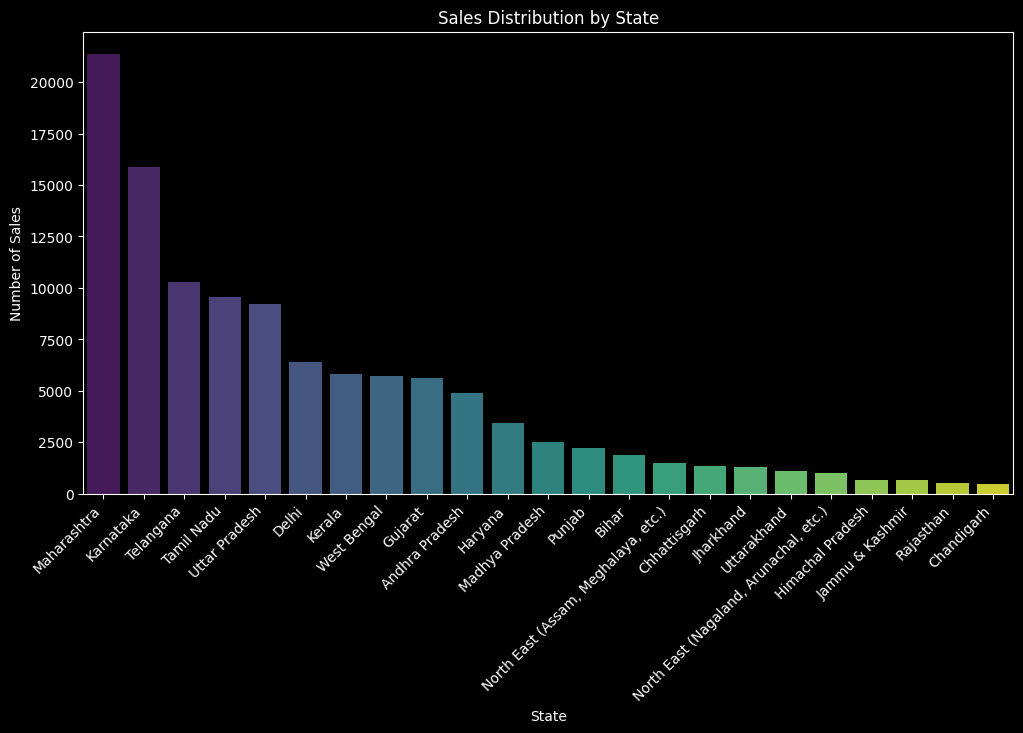

In [29]:
# Ensure column name is formatted correctly
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

# Extract first two digits of postal codes
df['Region Code'] = df['ship_postal_code'].astype(str).str[:2]

# Map region codes to state names
df['State'] = df['Region Code'].map(postal_code_mapping)

# Group by State and sum the sales quantity
state_sales = df.groupby('State')['Qty'].sum().reset_index()

# Sort states by sales quantity
state_sales = state_sales.sort_values(by='Qty', ascending=False)

# 📊 Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Qty', data=state_sales, palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.xlabel('State')
plt.ylabel('Number of Sales')
plt.title('Sales Distribution by State')

# Show the plot
plt.show()

/var/folders/nk/hgf7_brn39q9t4srskbh3vjr0000gn/T/ipykernel_2118/3713193418.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Qty', data=city_sales, palette='coolwarm')


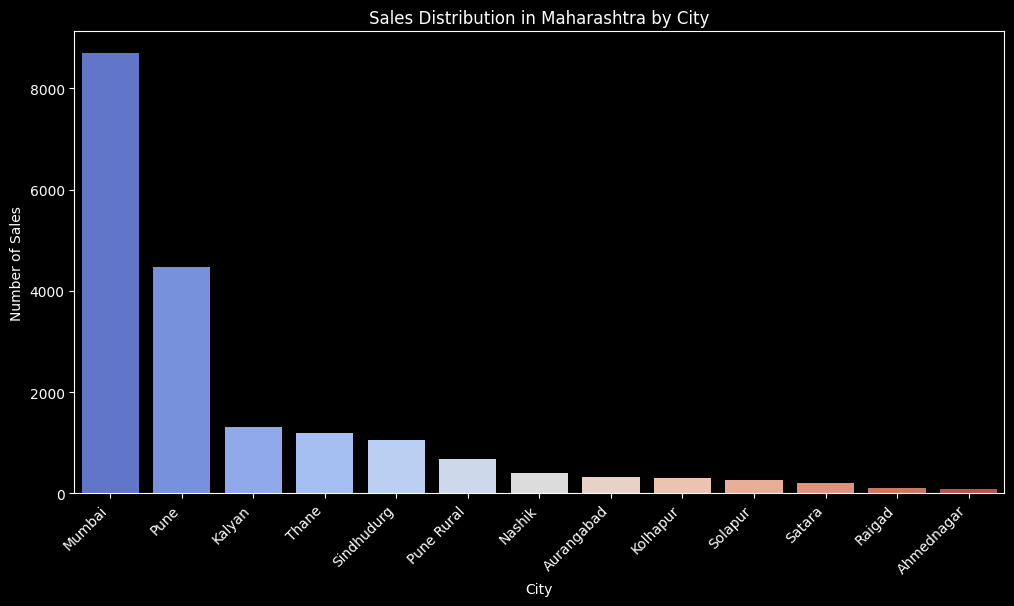

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct column naming
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

# Extract first 3 digits for city-level mapping
df['City Code'] = df['ship_postal_code'].astype(str).str[:3]

# Mapping of Maharashtra postal code prefixes to cities (partial list)
maharashtra_city_mapping = {
    '400': 'Mumbai',
    '401': 'Thane',
    '402': 'Raigad',
    '403': 'Sindhudurg',
    '411': 'Pune',
    '412': 'Pune Rural',
    '413': 'Solapur',
    '414': 'Ahmednagar',
    '415': 'Satara',
    '416': 'Kolhapur',
    '421': 'Kalyan',
    '422': 'Nashik',
    '431': 'Aurangabad'
}

# Map city codes to city names
df['City'] = df['City Code'].map(maharashtra_city_mapping)

# Filter only Maharashtra data (i.e., where city mapping is not NaN)
df_maharashtra = df.dropna(subset=['City'])

# Group by City and sum the sales quantity
city_sales = df_maharashtra.groupby('City')['Qty'].sum().reset_index()

# Sort by sales for better visualization
city_sales = city_sales.sort_values(by='Qty', ascending=False)

# 📊 Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Qty', data=city_sales, palette='coolwarm')

# Customize plot
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.xlabel('City')
plt.ylabel('Number of Sales')
plt.title('Sales Distribution in Maharashtra by City')

# Show the plot
plt.show()

/var/folders/nk/hgf7_brn39q9t4srskbh3vjr0000gn/T/ipykernel_2118/1844314191.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='City', y='Qty', data=city_sales, palette='coolwarm')


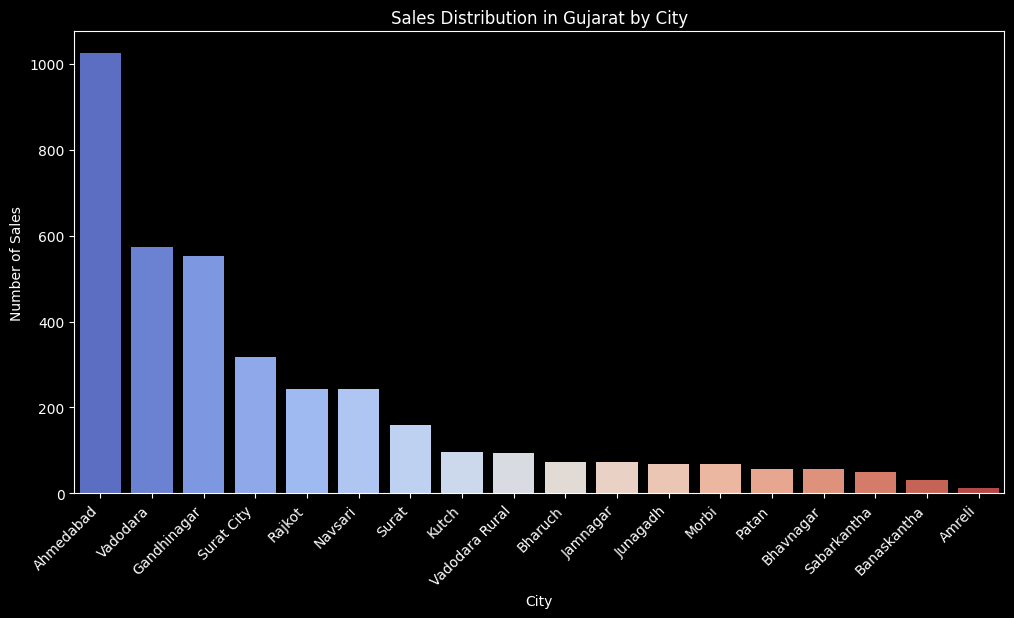

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure correct column naming
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

# Extract first 3 digits for city-level mapping
df['City Code'] = df['ship_postal_code'].astype(str).str[:3]

# Mapping of Gujarat postal code prefixes to cities (partial list)
gujarat_city_mapping = {
    '360': 'Rajkot',
    '361': 'Jamnagar',
    '362': 'Junagadh',
    '363': 'Morbi',
    '364': 'Bhavnagar',
    '365': 'Amreli',
    '370': 'Kutch',
    '371': 'Bhuj',
    '380': 'Ahmedabad',
    '382': 'Gandhinagar',
    '383': 'Sabarkantha',
    '384': 'Patan',
    '385': 'Banaskantha',
    '390': 'Vadodara',
    '391': 'Vadodara Rural',
    '392': 'Bharuch',
    '394': 'Surat',
    '395': 'Surat City',
    '396': 'Navsari',
    '397': 'Valsad'
}

# Map city codes to city names
df['City'] = df['City Code'].map(gujarat_city_mapping)

# Filter only Gujarat data (i.e., where city mapping is not NaN)
df_gujarat = df.dropna(subset=['City'])

# Group by City and sum the sales quantity
city_sales = df_gujarat.groupby('City')['Qty'].sum().reset_index()

# Sort by sales for better visualization
city_sales = city_sales.sort_values(by='Qty', ascending=False)

# 📊 Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Qty', data=city_sales, palette='coolwarm')

# Customize plot
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.xlabel('City')
plt.ylabel('Number of Sales')
plt.title('Sales Distribution in Gujarat by City')

# Show the plot
plt.show()